# Customer Churn Prediction — Part 2: Preprocessing & Feature Engineering

In this part, we will:
1. Load the cleaned dataset
2. Encode categorical variables
3. Scale numeric features
4. Handle class imbalance
5. Save the preprocessed data for modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load the cleaned data
df = pd.read_csv("../data/customer_churn_cleaned.csv")
print("Shape:", df.shape)
df.head()

Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [2]:
# 2️⃣ Identify categorical and numerical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

# Ensure target 'Churn' is not included in feature lists
if 'Churn' in num_cols:
    num_cols.remove('Churn')
print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [3]:
# 3️⃣ Encode categorical columns using LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ Encoded categorical columns.")
df.head()

✅ Encoded categorical columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [4]:
# 4️⃣ Scale numeric columns using StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("✅ Scaled numerical columns.")
df.head()

✅ Scaled numerical columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,-0.439916,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,3962,1,-0.439916,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,2564,1,-0.439916,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,5535,1,-0.439916,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,6511,0,-0.439916,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [5]:
# 5️⃣ Handle class imbalance using SMOTE
X = df.drop('Churn', axis=1)
y = df['Churn']

print("Before SMOTE:")
print(y.value_counts())

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("\nAfter SMOTE:")
print(pd.Series(y_res).value_counts())

Before SMOTE:
Churn
0    5174
1    1869
Name: count, dtype: int64

After SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64


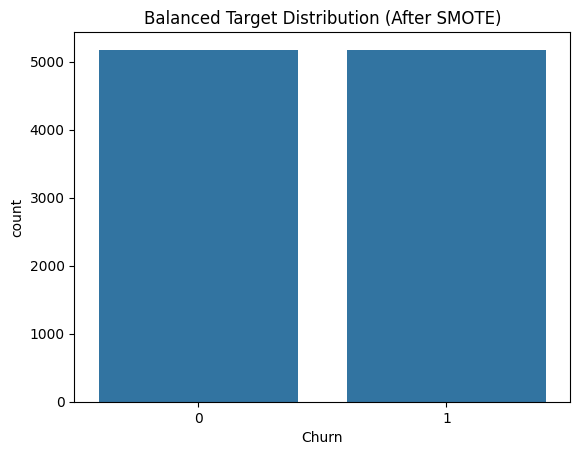

In [6]:
# 6️⃣ Combine back into a single DataFrame
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='Churn')], axis=1)

# 7️⃣ Visualize new target distribution
sns.countplot(x='Churn', data=df_resampled)
plt.title('Balanced Target Distribution (After SMOTE)')
plt.show()

In [7]:
# 8️⃣ Save the preprocessed dataset
df_resampled.to_csv("../data/customer_churn_preprocessed.csv", index=False)
print("✅ Saved preprocessed dataset as '../data/customer_churn_preprocessed.csv'")

✅ Saved preprocessed dataset as '../data/customer_churn_preprocessed.csv'
